<a href="https://colab.research.google.com/github/BirenderPanwar/TSAI_EIP4_Phase1/blob/master/session1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


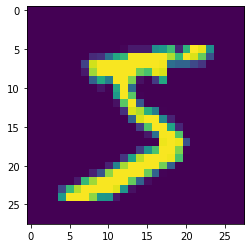

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential(name="model_mnist")

# Block-1 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1), use_bias = False, name="blk1_conv_layer1")) # 26X26X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk1_conv_layer2")) # 24X24X64
model.add(MaxPooling2D((2,2), name="blk1_maxpool")) # 12X12X64
model.add(Convolution2D(32,(1,1), activation='relu', use_bias = False, name="blk1_conv_layer3")) # 12X12X32

# Block-2 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer1")) # 10X10X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer2")) # 8X8X64
model.add(Convolution2D(128,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer3")) # 6X6X128
model.add(MaxPooling2D((2,2), name="blk2_maxpool"))  # 3X3X128
model.add(Convolution2D(10,(1,1), activation='relu', use_bias = False, name="blk2_conv_layer4")) # 3X3X10

model.add(Convolution2D(10,(3,3), use_bias = False, name="blk3_conv_layer1")) # 1X1X10

model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name="output"))

In [11]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_conv_layer1 (Conv2D)    (None, 26, 26, 32)        288       
_________________________________________________________________
blk1_conv_layer2 (Conv2D)    (None, 24, 24, 64)        18432     
_________________________________________________________________
blk1_maxpool (MaxPooling2D)  (None, 12, 12, 64)        0         
_________________________________________________________________
blk1_conv_layer3 (Conv2D)    (None, 12, 12, 32)        2048      
_________________________________________________________________
blk2_conv_layer1 (Conv2D)    (None, 10, 10, 32)        9216      
_________________________________________________________________
blk2_conv_layer2 (Conv2D)    (None, 8, 8, 64)          18432     
_________________________________________________________________
blk2_conv_layer3 (Conv2D)    (None, 6, 6, 128)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=28, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/20





60000/60000 [==============================] - 13s 210us/step - loss: 0.1650 - acc: 0.9476
Epoch 2/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0525 - acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0391 - acc: 0.9878
Epoch 4/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0316 - acc: 0.9899
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0245 - acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0224 - acc: 0.9930
Epoch 7/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0184 - acc: 0.9944
Epoch 8/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0164 - acc: 0.9946
Epoch 9/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0136 - acc: 0.9958
Epoch 10/20
60000/60000 [==============================] - 10s 171us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.04046478453790237, 0.9929]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.1250151e-14 2.0389508e-14 1.7423471e-11 1.8584370e-11 2.7258606e-16
  1.2068390e-13 1.0432850e-21 1.0000000e+00 2.1386327e-14 3.6967825e-11]
 [4.3012582e-16 9.4931294e-15 1.0000000e+00 1.9151033e-17 2.7378275e-21
  3.9623413e-22 6.7242198e-15 2.3760055e-16 4.3069741e-15 5.6432135e-22]
 [7.1393954e-14 1.0000000e+00 9.0084207e-12 7.8334592e-20 1.7740932e-12
  1.4400323e-12 8.0097407e-14 9.1390979e-13 6.9841528e-11 8.5920965e-11]
 [1.0000000e+00 4.1863386e-17 1.5433865e-15 2.0783473e-19 2.0416579e-19
  1.0282817e-15 3.1960370e-10 1.4669969e-14 7.0571981e-15 2.1986210e-15]
 [6.3699443e-27 7.2112533e-12 1.1499999e-17 3.2156311e-27 1.0000000e+00
  5.1689543e-21 6.5330244e-21 2.1146502e-16 1.1254367e-16 5.6239607e-10]
 [3.1212709e-16 1.0000000e+00 3.8621182e-14 8.0308760e-23 7.0408295e-13
  8.1935810e-16 2.9718217e-17 3.2760218e-12 2.9351633e-15 1.4546003e-11]
 [7.6624529e-28 6.8567169e-10 9.4089022e-17 2.5060970e-25 1.0000000e+00
  9.2277564e-18 1.0915502e-26 7.0598177e-13 6.1907619e-13 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

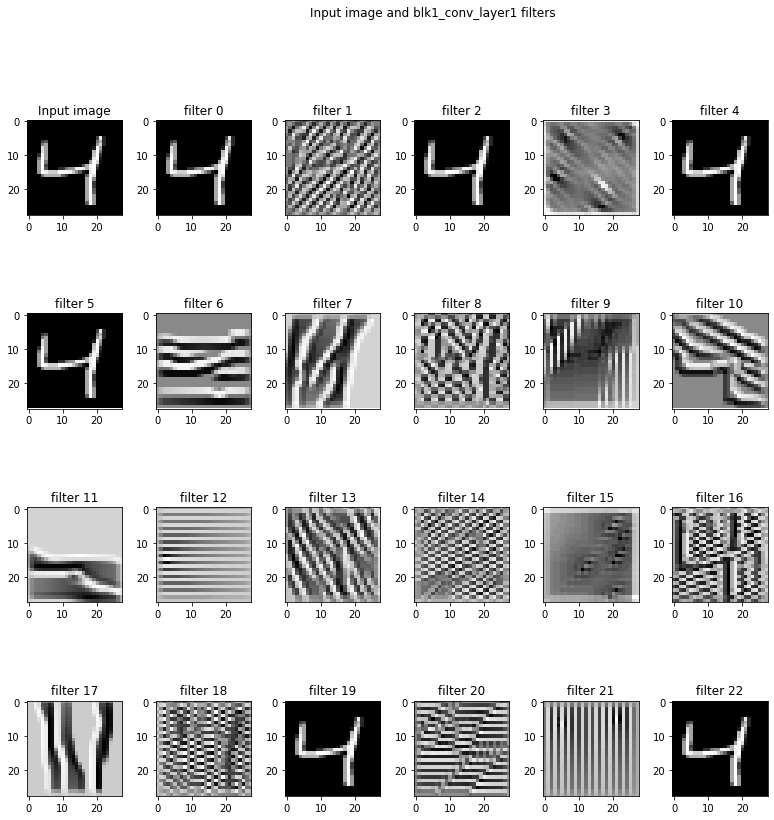

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'blk1_conv_layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()